In [1]:
using Pkg
Pkg.activate("..")
using Revise
using IMAS
using Plots

  Activating environment at `~/Coding/julia/IMAS/Project.toml`
┌ Info: Precompiling IMAS [13ead8c1-b7d1-41bb-a6d0-5b8b65ed587a]
└ @ Base loading.jl:1317


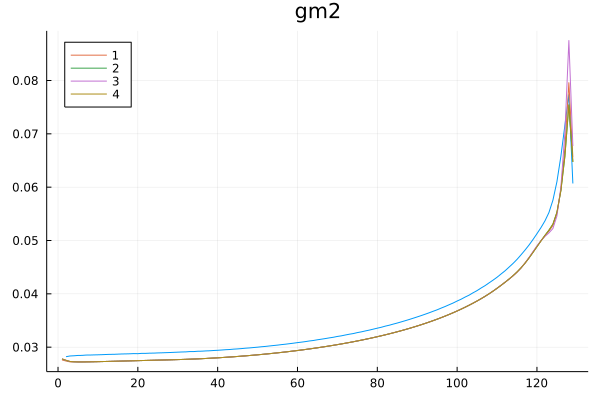

In [12]:
#filename = ENV["HOME"]*"/.julia/dev/QED/sample/eq.json"
#filename = ENV["HOME"]*"/.julia/dev/FUSE/sample/CAT_eq_ods.json"
filename = ENV["HOME"]*"/.julia/dev/FUSE/sample/ITER_eq_ods.json"
data  = IMAS.json2imas(filename; verbose=false)
eqt = data.equilibrium.time_slice[1]


what=:gm2
tmp1=getproperty(eqt.profiles_1d,what)
p=plot(2:length(tmp1),tmp1[2:end],label="")
for upsample_factor in 1:4
    IMAS.flux_surfaces(eqt;upsample_factor)
    tmp2=getproperty(eqt.profiles_1d,what)
    plot!(tmp2,label="$(upsample_factor)",legend=:topleft,title=String(what))
end
display(p)